In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import Locator, MaxNLocator # added 
from tqdm import tqdm
from scipy import stats, interpolate
import yaml

from n3jet.utils import FKSPartition
from n3jet.utils.general_utils import bool_convert

In [2]:
yaml_file_5 = '/mt/home/jbullock/n3jet/n3jet/runs/runs/diphoton/3g2A/RAMBO/parallel_fixed/fks_all_legs_all_pairs_new_sherpa_cuts_pdf_njet.yaml'
yaml_file_6 = '/mt/home/jbullock/n3jet/n3jet/runs/runs/diphoton/4g2A/RAMBO/fks_all_legs_all_pairs_new_sherpa_cuts_pdf_njet.yaml'

In [3]:
delta_nears = [0.001,0.0025,0.005,0.01,0.02,0.03,0.04]

## 5-point

In [5]:
with open(yaml_file_5) as f:
    y = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
momenta_file_5 = y["testing"]["mom_file"]
events_file_5 = y["testing"]["nj_file"]
testing_points_5 = y["testing"]["testing_points"]
delta_cut_5 = y["delta_cut"]
all_legs_5 = bool_convert(y["all_legs"])

In [7]:
momenta_5 = np.load(momenta_file_5, allow_pickle=True)
momenta_5 = momenta_5.tolist()

In [8]:
nj_inf_5 = np.load(events_file_5, allow_pickle=True)

In [9]:
fks_5 = FKSPartition(
    momenta = momenta_5,
    labels = nj_inf_5,
    all_legs = all_legs_5
)

In [12]:
test_cut_momentas_5 = []
test_near_momentas_5 = []
test_cut_njs_5 = []
test_near_njs_5 = []

for delta_near in delta_nears:
    test_cut_momenta, test_near_momenta, test_cut_nj, test_near_nj = fks_5.cut_near_split(
        delta_cut = delta_cut_5,
        delta_near = delta_near
    )
    test_cut_momentas_5.append(test_cut_momenta)
    test_near_momentas_5.append(test_near_momenta)
    test_cut_njs_5.append(test_cut_nj)
    test_near_njs_5.append(test_near_nj)

100%|██████████| 1000000/1000000 [00:40<00:00, 24649.93it/s]


## 6-point

In [13]:
with open(yaml_file_6) as f:
    y = yaml.load(f, Loader=yaml.FullLoader)

In [14]:
momenta_file_6 = y["testing"]["mom_file"]
events_file_6 = y["testing"]["nj_file"]
testing_points_6 = y["testing"]["testing_points"]
delta_cut_6 = y["delta_cut"]
all_legs_6 = bool_convert(y["all_legs"])

In [15]:
momenta_6 = np.load(momenta_file_6, allow_pickle=True)
momenta_6 = momenta_6.tolist()

In [16]:
nj_inf_6 = np.load(events_file_6, allow_pickle=True)

In [17]:
fks_6 = FKSPartition(
    momenta = momenta_6,
    labels = nj_inf_6,
    all_legs = all_legs_6
)

In [18]:
test_cut_momentas_6 = []
test_near_momentas_6 = []
test_cut_njs_6 = []
test_near_njs_6 = []

for delta_near in delta_nears:
    test_cut_momenta, test_near_momenta, test_cut_nj, test_near_nj = fks_6.cut_near_split(
        delta_cut = delta_cut_6,
        delta_near = delta_near
    )
    test_cut_momentas_6.append(test_cut_momenta)
    test_near_momentas_6.append(test_near_momenta)
    test_cut_njs_6.append(test_cut_nj)
    test_near_njs_6.append(test_near_nj)

100%|██████████| 1000000/1000000 [00:54<00:00, 18297.42it/s]


## Plotting

In [32]:
lengths_5 = []
x_labels = []
for idx, i in enumerate(test_near_momentas_5):
    lengths_5.append(len(i))
    x_labels.append(delta_nears[idx])
lengths_6 = []
for idx, i in enumerate(test_near_momentas_6):
    lengths_6.append(len(i))

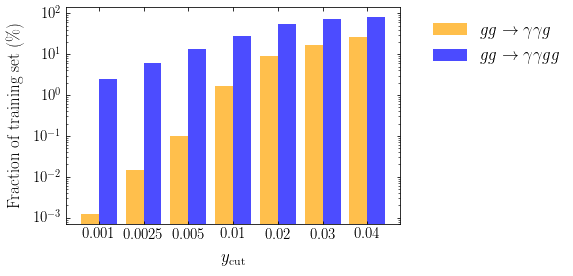

In [47]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.arange(len(delta_nears))

plt.bar(x-0.2, np.array(lengths_5)*100/float(testing_points_5), width=0.4, align='center', color='orange', alpha=0.7, label=r'$gg\rightarrow\gamma\gamma g$')
plt.bar(x+0.2, np.array(lengths_6)*100/float(testing_points_6), width=0.4, align='center', color='blue', alpha=0.7, label=r'$gg\rightarrow\gamma\gamma gg$')

plt.xticks(x, x_labels)

plt.tick_params(axis='x', labelsize=15, direction = 'in', top = True, which='both')
plt.tick_params(axis='y', labelsize=15, direction = 'in', right = True, which='both')
plt.yscale('log')

plt.ylabel('Fraction of training set (\%)', fontsize=17, labelpad=10)
plt.xlabel(r'$y_{\mathrm{cut}}$', fontsize=17, labelpad=10)

plt.legend(prop={"size":17}, frameon = False, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.savefig('./paper_plots/y_cut_tuning.pdf', dpi=150, bbox_inches='tight')
plt.show()